In [28]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
path= r"D:\All project data\KL-CENSUS2011"

In [35]:
files= os.listdir(path)
files_xls = [f for f in files if f[-3:] == 'xls']

In [36]:
import xlrd
files_xls = [os.path.join(path, name) for name in files_xls]
files_xls

['D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3201_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3202_F_Census (1).xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3202_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3204_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3205_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3206_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3207_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3208_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3209_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3210_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3211_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3212_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3213_F_Census.xls',
 'D:\\All project data\\KL-CENSUS2011\\PCA_CDB_3214_F_Census.xls']

In [37]:
len(files_xls)

14

In [38]:
l=[0]
s5=[0]
s6=[0]
s7=[0]
s8=[0]
s9=[0]
s10=[0]
s11=[0]
s12=[0]
s13=[0]
for f in (files_xls):
    
    #F=(files_xls[i])
    df = pd.read_excel( f )#, sheetname='Sheet1')
    df = df[df['Total/Rural/Urban']== 'Rural']
    s5.append(df['Non Working Population Person'].sum())
    s6.append(df['Non Working Population Male'].sum())
    s7.append(df['Main Agricultural Labourers Population Person'].sum()+df['Marginal Agriculture Labourers Population Person'].sum())
    s8.append(df['Population in the age group 0-6 Person'].sum())
    s9.append(df['Scheduled Castes population Person'].sum()+df['Scheduled Tribes population Person'].sum())
    s10.append(df['Literates Population Person'].sum())
    s11.append(df['Illiterate Persons'].sum())
    s12.append(df['Marginal Worker Population Person'].sum())
    s13.append(df['Main Working Population Person'].sum())
    l.append(df['District_Name'][1])
len(s12)

15

In [6]:
l

[0,
 'Uttarkashi',
 'Chamoli',
 'Rudraprayag',
 'Tehri Garhwal',
 'Dehradun',
 'Garhwal',
 'Pithoragarh',
 'Bageshwar',
 'Almora',
 'Champawat',
 'Nainital',
 'Udham Singh Nagar',
 'Hardwar']

In [29]:
districts= gpd.read_file(r"C:\Users\Pranjali\Downloads\india-village-census-2001-KL.shp")

In [30]:
g = districts['geometry']

In [31]:
g1 = g.buffer(0)

In [32]:
districts['geometry'] = g1

In [33]:
district = districts.dissolve(by='DISTRICT', aggfunc = 'mean')

In [34]:
district

geometry            UID  \
DISTRICT                                                                     
0         (POLYGON ((56338.73178577842 931318.7508156595...  608852.729032   
1         POLYGON ((-140154.4588505239 1366805.489403846...  609184.700000   
2         POLYGON ((-113639.5959986055 1317204.230450189...  609291.191304   
3         POLYGON ((-24492.47473034542 1275686.288525151...  608078.000000   
4         POLYGON ((-64525.4479217074 1258256.411803268,...  608887.141414   
5         POLYGON ((-11593.98263141222 1213593.005747018...  608760.411290   
6         POLYGON ((-31607.25825447519 1189178.678166708...  608611.033113   
7         (POLYGON ((-29670.4417921094 1129839.316308241...  608222.290179   
8         (POLYGON ((-21438.15661192594 1107727.68402760...  609484.632075   
9         POLYGON ((96720.54338046693 1061221.926474128,...  609390.312500   
10        POLYGON ((51071.99673289747 1071850.222126373,...  608992.800000   
11        POLYGON ((21581.38900497364 1020786.008003336,...  609591.928571   
12        POLYGON ((5467.918727117183 1036651.020405835,...  608499.681818   
13        POLYGON ((63539.42719752196 979764.0946324393,...  609090.891304   
14        (POLYGON ((70088.17888299981 918868.9577037424...  608408.966292   

            CENSUS_COD  STATE  SUB_DIST     TOWN_VILL  WARD   EB        No_HH  \
DISTRICT                                                                        
0         0.000000e+00    0.0  0.000000  0.000000e+00   0.0  0.0     0.000000   
1         3.201000e+15   32.0  1.475000  3.014019e+06   0.0  0.0  3717.150000   
2         3.202000e+15   32.0  2.008696  1.295134e+07   0.0  0.0  3705.400000   
3         3.203000e+15   32.0  2.040816  8.434816e+05   0.0  0.0  3403.326531   
4         3.204000e+15   32.0  2.111111  4.514848e+06   0.0  0.0  4468.191919   
5         3.205000e+15   32.0  3.080645  1.670111e+06   0.0  0.0  4762.362903   
6         3.206000e+15   32.0  2.907285  1.663245e+06   0.0  0.0  3819.490066   
7         3.207000e+15   32.0  2.785714  4.242546e+06   0.0  0.0  2699.750000   
8         3.208000e+15   32.0  3.830189  7.384622e+06   0.0  0.0  4498.773585   
9         3.209000e+15   32.0  2.421875  9.175000e+04   0.0  0.0  3941.500000   
10        3.210000e+15   32.0  2.600000  2.505375e+06   0.0  0.0  4545.776471   
11        3.211000e+15   32.0  3.464286  4.500364e+06   0.0  0.0  5166.392857   
12        3.212000e+15   32.0  3.287879  1.982365e+06   0.0  0.0  4450.969697   
13        3.213000e+15   32.0  3.304348  1.017850e+06   0.0  0.0  5446.532609   
14        3.214000e+15   32.0  2.415730  2.449074e+06   0.0  0.0  9740.730337   

                 TOT_P  ...    TW_W_EL    TANK_IRR   RIVER_IRR   LAKE_IRR  \
DISTRICT                ...                                                 
0             0.000000  ...   0.000000    0.000000    0.000000   0.000000   
1         19144.700000  ...  30.731875  100.505875   91.222125   5.191500   
2         19404.634783  ...   2.848261   32.298000   54.412522   0.078087   
3         15931.000000  ...  13.715510    0.918776  165.314082   0.148776   
4         22260.666667  ...   0.132323    3.846869   18.644848   0.122323   
5         28108.741935  ...   4.681774   24.375806   76.592823   0.059113   
6         18804.927152  ...  16.193444   13.718808   60.142980   0.059603   
7         12559.334821  ...  15.586696   17.417277   14.798527   5.878661   
8         20081.462264  ...   5.537453   11.733962   16.286604   4.922547   
9         16744.187500  ...   7.828125   49.715156   30.658594   4.687500   
10        20450.882353  ...   0.317647    0.690471   13.808353   0.000000   
11        22512.178571  ...  36.454286   12.637500  300.058690   9.852500   
12        18483.636364  ...   0.181818    5.144545   47.015303   0.199545   
13        23513.141304  ...   1.721087   13.850543   23.295652  20.620543   
14        41168.842697  ...   1.070899   57.370449   17.731011   4.190674   

             W_FALL     OTH_IRR     

In [39]:
df2 = pd.read_excel(r"D:\All project data\KL-CENSUS2011\DCHB_Village_Release_3200.xlsx")

In [46]:
df1 = pd.read_excel( r"D:\All project data\KL-CENSUS2011\SECC-Employment and Income Characteristics (Rural).xlsx", sheetname='Sheet1')

In [47]:
for i in range(len(l)):
    print(i,df1['DISTRICT'][i],l[i])

0 0 0
1 Kasaragod Kasaragod
2 Kannur Kannur
3 Wayanad Kannur
4 Kozhikode Kozhikode
5 Malappuram Malappuram
6 Palakkad Palakkad
7 Thrissur Thrissur
8 Ernakulam Ernakulam
9 Idukki Idukki 
10 Kottayam Kottayam
11 Alappuzha Alappuzha
12 Pathanamthitta Pathanamthitta
13 Kollam Kollam
14 Thiruvananthapuram Thiruvananthapuram


In [181]:
df1['DISTRICT'][51]

'Balrampur'

In [48]:
df2['Total Unirrigated Land Area (in Hectares)'][0]

55.0

In [49]:
import numpy as np
unirr_area=[0]
irr_area=[0]
hosp=[0,0]
tot_p=[0]

for i in range(1,14):
    sum1=0
    sum2=0
    sum3=0
    sum4=0

    for j in range(len(df2['District Name'])):
        if(df2['District Name'][j]== df1['DISTRICT'][i]):
            sum1=sum1+df2['Total Unirrigated Land Area (in Hectares)'][j]
            sum2=sum2+df2['Area Irrigated by Source (in Hectares)'][j]
            sum3=sum3+df2['Dispensary (Numbers)'][j]+df2['Hospital Allopathic (Numbers)'][j]
            sum4=sum4+df2['Total Population of Village'][j]

    hosp.append(sum3)       
    unirr_area.append(sum1)
    irr_area.append(sum2)
    tot_p.append(sum4)

In [25]:
for i in range(len(tot_p)):
    print(i,tot_p[i])

0 0
1 305781
2 332209
3 232360
4 548792
5 754753
6 574568
7 413834
8 250819
9 560192
10 221305
11 578120
12 1062142
13 1197328


In [21]:
print(df1['DISTRICT'][9])

Almora


In [114]:
for i in range(0,33):
    for j in range(len(df2['District Name'])):
        if(df2['District Name'][j]== df1['DISTRICT'][i]):
            print(df1['DISTRICT'][i],df2['District Name'][j])
    

Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar

Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar

Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar Ganganagar
Ganganagar

Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanu

Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanumangarh
Hanumangarh Hanu

Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner Bikaner
Bikaner 

Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Churu Churu
Chur

Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun Jhunjhunun
Jhunjhunun

Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwa

Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwar Alwar
Alwa

Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur


Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur
Bharatpur Bharatpur


Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli Karauli
Karauli 

Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madhopur Sawai Madhopur
Sawai Madh

Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Dausa Dausa
Daus

Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur

Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur Jaipur
Jaipur

Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sika

Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sikar Sikar
Sika

Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur Nagaur
Nagaur

Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur Jodhpur
Jodhpur 

Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer
Jaisalmer Jaisalmer


Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer

Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer

Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer

Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer Barmer
Barmer

Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi Sirohi
Sirohi

Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali
Pali Pali


Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk
Tonk Tonk


Tonk Tonk
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi Bundi
Bundi 

Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara B

Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara Bhilwara
Bhilwara B

Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand
Rajsamand Rajsamand


Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur
Dungarpur Dungarpur


Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara B

Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara Banswara
Banswara B

Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh Chittaurgarh
Chittaurgarh

Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota
Kota Kota


Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Bara

Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Baran Baran
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar J

Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar Jhalawar
Jhalawar J

Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur Udaipur
Udaipur 

In [57]:
df2['District Name'][23]

'West Nimar'

In [34]:
len(df1['DISTRICT'])

23

In [29]:

df1['unirr_area']=unirr_area
df1['irr_area']=irr_area
df1['TP']= tot_p
df1['noworker']= s5
df1['noworkerm']=s6
df1['agriworker']=s7
df1['infants']=s8
df1['tribal']=s9
df1['literate']=s10
df1['illiterate']=s11
df1['margworker']=s12
df1['mworker']=s13
#df1.to_excel( r"C:\Users\Pranjali\Downloads\SECC-Employment and Income Characteristics (Rural)final2.xlsx")


In [273]:
corrected = pd.DataFrame({'unirr':unirr_area,'irr':irr_area,'pop':totalp})
corrected.to_excel(r"C:\Users\Pranjali\Downloads\corrected2.xlsx")

In [30]:
df1

DISTRICT  Tothhold  saljob pcsaljob  govtsal pcgovtsal  publicsal  \
0                 0         0       0        0        0         0          0   
1        Uttarkashi     64836    9465   14.60%     7592    11.71%        407   
2           Chamoli     70323   18926   26.91%    14630    20.80%       1102   
3       Rudraprayag     48830   11037   22.60%     6291    12.88%       1114   
4      TehriGarhwal    119766   31554   26.35%    10682     8.92%       2832   
5          Dehradun    165649   65216   39.37%    34317    20.72%       4303   
6           Garhwal    140122   35025   25.00%    23017    16.43%       2812   
7       Pithoragarh     91906   26197   28.50%    18798    20.45%       1042   
8         Bageshwar     53420   15998   29.95%     8362    15.65%       1122   
9            Almora    125275   26974   21.53%    14772    11.79%       1935   
10        Champawat     44150    7310   16.56%     4972    11.26%        323   
11         Nainital    117469   28223   24.03%    13526    11.51%       3819   
12  UdhamSinghNagar    206204   37708   18.29%    15426     7.48%       4022   
13          Hardwar    231792   36676   15.82%    11694     5.05%       4802   

   pcpublicsal  salaryjob pcsalaryjob  ...       TP  noworker noworkerm  \
0            0          0           0  ...        0         0         0   
1        0.63%       1466       2.26%  ...   305781    313428    154768   
2        1.57%       3194       4.54%  ...   332209    348600    169056   
3        2.28%       3632       7.44%  ...   232360    247642    119882   
4        2.36%      18040      15.06%  ...   548792    582526    276032   
5        2.60%      26596      16.06%  ...   754753    978824    388996   
6        2.01%       9196       6.56%  ...   574568    667564    296580   
7        1.13%       6357       6.92%  ...   413834    434750    209812   
8        2.10%       6515      12.20%  ...   250819    259904    126286   
9        1.54%      10267       8.20%  ...   560192    566558    265288   
10       0.73%       2015       4.56%  ...   221305    266426    120482   
11       3.25%      10878       9.26%  ...   578120    648440    282882   
12       1.95%      18260       8.86%  ...  1062142   1312026    523702   
13       2.07%      20180       8.71%  ...  1197328   1676154    650970   

    agriworker infants  tribal  literate  illiterate  margworker  mworker  
0            0       0       0         0           0           0        0  
1         8544   87326  160498    391818      219744       55704   242430  
2         7128   90434  154092    464606      199812      126784   189034  
3         6098   61990   93176    325888      138832       66748   150330  
4        15956  153436  190516    705552      392032      224894   290164  
5        64516  199914  441196   1035672      473834      118710   411972  
6        26454  142340  223056    809116      340020      211978   269594  
7        10506  109800  250912    578512      249156      135496   257422  
8        17870   69090  143432    344332      157306       89890   151844  
9        20436  148750  283362    766178      354206      191538   362288  
10        7504   64684   85618    299820      142790       71634   104550  
11       65822  158424  287372    835940      329802      134352   382950  
12      300128  299772  584600   1305434      818850      227760   584498  
13      194720  395592  625138   1365232     1029424      120914   597588  

[14 rows x 27 columns]

In [ ]:

district = districts.dissolve(by='DISTRICT', aggfunc = 'mean')

In [38]:
district

NameError: name 'district' is not defined

In [68]:
df1['geometry']= district['geometry'][:5]
df1['geometry'][5:23]= district['geometry'][6:24]
df1.to_excel( r"C:\Users\Pranjali\Downloads\SECC-Employment and Income Characteristics (Rural)final-AP.xlsx")

C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
d = pd.read_excel(r"C:\Users\Pranjali\Downloads\SECC-Employment and Income Characteristics (Rural)final-AP.xlsx")
d['geometry']= df1['geometry']
ruralMH_2011 = gpd.GeoDataFrame(d)
ruralMH_2011.to_file(driver ='ESRI Shapefile',filename= r"C:\Users\Pranjali\Downloads\rural-AP_2011.shp")

In [46]:
district1=district.drop(5,axis=0)

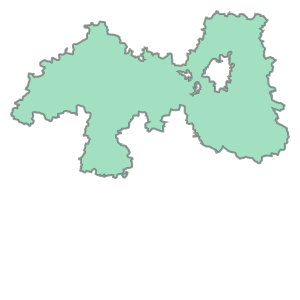

In [66]:
d['geometry'][5]